In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [4]:
np.random.seed(50)
height = np.random.randint(140, 200, 200)
weight = np.random.randint(40, 120, 200)
age = np.random.randint(18, 70, 200)
bmi = weight / ((height / 100) ** 2)

In [5]:
def category(bmi):
    if bmi <= 19 and bmi > 1:
        return "under weight"
    elif bmi <= 24 and bmi > 19:
        return "normal"
    else:
        return "overweight"


categories = np.array([category(b) for b in bmi])
bmi_df = pd.DataFrame({
    "height": height,
    "weight": weight,
    "age": age,
    "bmi": bmi,
    "category": categories
})

In [6]:
l_c = LabelEncoder()
bmi_df["category"] = l_c.fit_transform(bmi_df["category"])
bmi_df

,height,weight,age,bmi,category
0,188,104,43,29.425079,1
1,172,118,46,39.886425,1
2,151,92,18,40.349107,1
3,185,66,43,19.284149,0
4,173,85,45,28.400548,1
...,...,...,...,...,...
195,154,87,30,36.684095,1
196,196,99,32,25.770512,1
197,142,70,62,34.715334,1
198,180,103,57,31.790123,1


In [7]:
X = bmi_df[["height", "weight"]] 
y = bmi_df["category"] 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


In [9]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [10]:
y_train_labels = l_c.inverse_transform(y_train)


In [11]:
plot_df = X_train.copy()
plot_df['category'] = y_train_labels

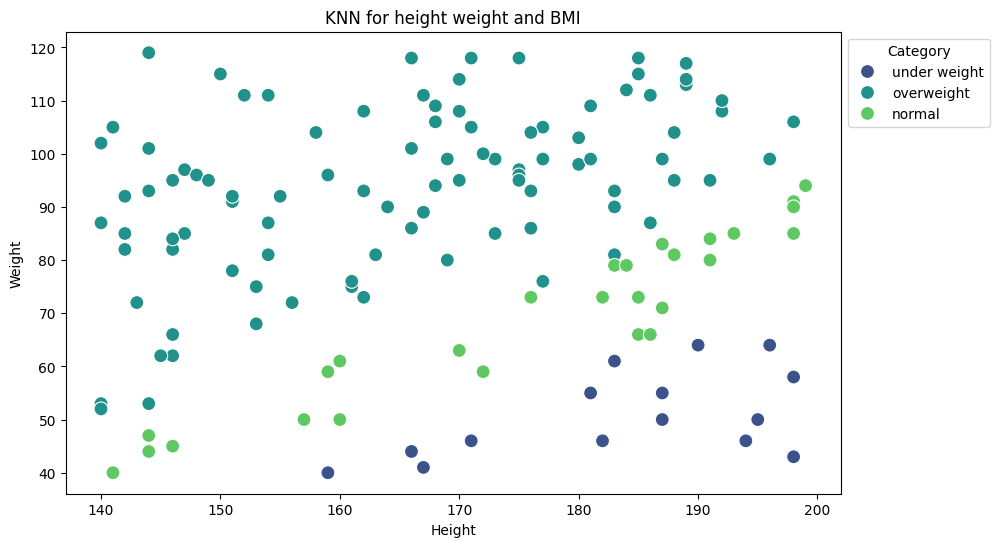

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x="height", y="weight", hue="category", palette="viridis", s=100)
plt.title("KNN for height weight and BMI")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(title="Category", bbox_to_anchor=(1, 0.2,0.2, 0.8), loc='upper left')
plt.show()

Enter your height in cm:  177
Enter your weight in kg:  60


 height 177.0 cm and weight 60.0 kg: normal
Distances to nearest neighbors: [[5.09901951 6.08276253 6.40312424 7.61577311]]


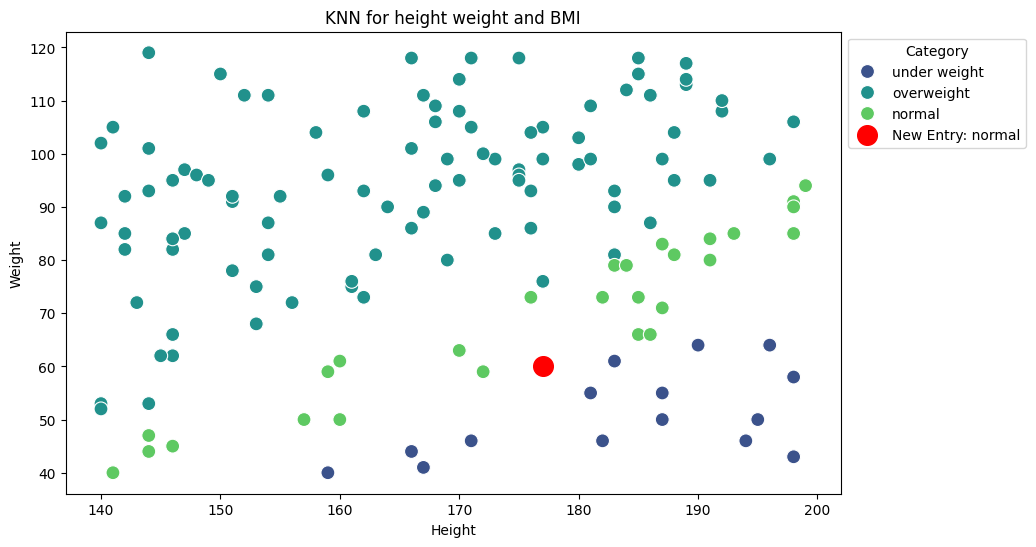

In [14]:
def predictBMI(height, weight, model, l_c):
   
    data = np.array([[height, weight]])
    predicted_label = model.predict(data)
    predicted_category = l_c.inverse_transform(predicted_label)[0]
    return predicted_category

user_h = float(input("Enter your height in cm: "))
user_w = float(input("Enter your weight in kg: "))

predicted_cat = predictBMI(user_h, user_w, model, l_c)
print(f" height {user_h} cm and weight {user_w} kg: {predicted_cat}")

input_data = np.array([[user_h, user_w]])
d, i = model.kneighbors(input_data, n_neighbors=4)

print(f"Distances to nearest neighbors: {d}")


plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x="height", y="weight", hue="category", palette="viridis", s=100)
plt.scatter(user_h, user_w, color='r', s=200, label=f'New Entry: {predicted_cat}')
plt.title("KNN for height weight and BMI")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(title="Category", bbox_to_anchor=(1, 0.2, 0.2, 0.8), loc='upper left')
plt.show()


In [ ]:
wine quality analysis
